# Imports

In [1]:
#tabular manipulation
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#custom modules
import acquire
import prepare
from env import host, user, password

#remove warnings
import warnings
warnings.filterwarnings("ignore")

<hr style="border:2px solid black"> </hr>

# Acquire using .txt file

In [2]:
#custom function from acquire.py
df_txt = acquire.get_data("anonymized-curriculum-access-07-2021.txt", ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip'])

In [3]:
#take a look at the data
df_txt.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [4]:
#look at size, dtypes, nulls
df_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018810 entries, 0 to 1018809
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   date       1018810 non-null  object 
 1   endpoint   1018809 non-null  object 
 2   user_id    1018810 non-null  int64  
 3   cohort_id  965313 non-null   float64
 4   source_ip  1018810 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 38.9+ MB


In [5]:
df_txt.isnull().sum()

date             0
endpoint         1
user_id          0
cohort_id    53497
source_ip        0
dtype: int64

# Acquire using SQL database

In [6]:
#custom function from acquire.py
df2 = acquire.get_sql_data()

In [7]:
#take a look
df2.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0


In [8]:
#look at size, nulls and dtypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 103.0+ MB


In [9]:
#check the nulls for df2
df2.isnull().sum()

date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
dtype: int64

### Takeaways from Acquire:

- .txt file appears to have:
    - 6 columns
    - object, int, float datatypes
    - many nulls in 'cohort_id'
    
    <br>

- SQL dataframe appears to have:
    - 15 columns
    - float, int, object datatypes
    - nulls in several columns
    - no data in 'deleted_at' column (possibly delete)


<hr style="border:2px solid black"> </hr>

# Prepare

In [10]:
#use prep function from prepare.py
df = prepare.prep_df(df2)

In [11]:
#take a look 
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2


In [12]:
#make sure all nulls were removed
df.isnull().sum()

path          0
user_id       0
cohort_id     0
ip            0
name          0
start_date    0
end_date      0
created_at    0
updated_at    0
program_id    0
dtype: int64

In [13]:
#confirm dtypes were changed and appropiate columns were dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900223 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   900223 non-null  int64         
 3   ip          900223 non-null  object        
 4   name        900223 non-null  object        
 5   start_date  900223 non-null  datetime64[ns]
 6   end_date    900223 non-null  datetime64[ns]
 7   created_at  900223 non-null  datetime64[ns]
 8   updated_at  900223 non-null  datetime64[ns]
 9   program_id  900223 non-null  int64         
dtypes: datetime64[ns](4), int64(3), object(3)
memory usage: 75.5+ MB


### Takeaways from Prepare:
- Final dataframe is:
    - 10 columns
    - object, int, and datatime datatypes

<hr style="border:2px solid black"> </hr>

# Explore

In [14]:
def acquire(file_name, column_names):
    return pd.read_csv(file_name, sep="\s", header=None, names=column_names, usecols=[0, 2, 3, 4, 5])

def prep(df, user):
    df = df[df.user_id == user]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages = df['endpoint'].resample('d').count()
    return pages

def compute_pct_b(pages, span, weight, user):
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis=1)
    my_df = pd.concat([pages, midband, bb], axis=1)
    my_df.columns = ['pages', 'midband', 'ub', 'lb']
    my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

def find_anomalies(df, user, span, weight):
    pages = prep(df, user)
    my_df = compute_pct_b(pages, span, weight, user)
    # plt_bands(my_df, user)
    return my_df[my_df.pct_b>1]

In [15]:
df_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018810 entries, 0 to 1018809
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   date       1018810 non-null  object 
 1   endpoint   1018809 non-null  object 
 2   user_id    1018810 non-null  int64  
 3   cohort_id  965313 non-null   float64
 4   source_ip  1018810 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 38.9+ MB


### Questions:
1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
3. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
4. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
5. Which lessons are least accessed?

<hr style="border:1px solid black"> </hr>

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [16]:
# Value counts of program_id
df.program_id.value_counts()

2    713365
3    103412
0     52893
1     30548
4         5
Name: program_id, dtype: int64

In [17]:
# Review program 4 observations
df[df.program_id==4]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-03-22,/,152,9,207.68.209.17,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,4
2018-03-22,content/html-css,152,9,207.68.209.17,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,4
2018-03-22,content/html-css/gitbook/images/favicon.ico,152,9,207.68.209.17,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,4
2018-03-22,content/html-css,152,9,207.68.209.17,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,4
2018-03-22,content/html-css/introduction.html,152,9,207.68.209.17,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,4


##### Note: Program 4 only contains 5 observations, all occuring on the same day. It doesn't appear to be associated with any viable CodeUp Program so going to exclude when exploring

In [18]:
# loop through all Programs grouping by program_id and pulling 7 largest path counts
pd.set_option('display.max_rows', None)
program_list = [1, 2, 3]

for p in program_list:
        
        prog_df = pd.DataFrame(df).groupby('program_id')['path'].value_counts()
        p_df = prog_df.loc[[p]]
        p_df = pd.DataFrame(p_df.nlargest(7))
        print(p_df)

                         path
program_id path              
1          /             1681
           index.html    1011
           javascript-i   736
           html-css       542
           spring         501
           java-iii       479
           java-ii        454
                                      path
program_id path                           
2          /                         35814
           javascript-i              17457
           toc                       17428
           search/search_index.json  15212
           java-iii                  12683
           html-css                  12569
           java-ii                   11719
                                                     path
program_id path                                          
3          /                                         8358
           search/search_index.json                  2203
           classification/overview                   1785
           1-fundamentals/modern-data-scientist.jpg  

### Takeaways:
- Program IDs 1 & 2 appear to be Web Development programs while Program 3 is the Data Science program

<br>

- Comparing across the Web Development Programs 1 & 2:
    - javascript-i is the most accessed lesson
        - '/' is the most visited path across all programs but is not a curriculum page and is not considered
        - Again, index.html is the most visited path in Program 1 but is only referencing the Homepage not a curriculum page
    - html-css & java-iii are the next most visited curriculum pages across both cohorts
    - **NOTE**: the spring, jquery and mysql curriculum pages were also highly visited across both Programs

        <br>
        
- Looking at the Data Science program, Program 3:
    - classification/overview is the most visited curriculum and then followed by:
        - 1-fundamentals/modern-data-scientist.jpg 1655
        - 1-fundamentals/AI-ML-DL-timeline.jpg 1651
        - 1-fundamentals/1.1-intro-to-data-science 1633
        - classification/scale_features_or_not.svg

<hr style="border:2px solid black"> </hr>

### #2. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [19]:
#create a column of users that accessed curriculum while active
df['user_access'] = (df.index < df.end_date) & (df.index > df.start_date)

In [20]:
#turn that column into  bool
df['user_access'] = df['user_access'].astype(int)

In [21]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_access
date,,,,,,,,,,,
2018-01-26,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0
2018-01-26,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0
2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0
2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0
2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,1


In [22]:
#call only users who accessed curriculum while active
user_access_df = df.loc[df['user_access'] == 1]

In [23]:
#turn that into a DF
user_df = pd.DataFrame(user_access_df).groupby('user_id')['path'].value_counts()

In [24]:
user_df.head()

user_id  path    
2        /           68
         java-iii    50
         mysql       32
         java-ii     30
         spring      29
Name: path, dtype: int64

In [25]:
#identify unique users in a list
user_list = df.user_id.unique().tolist()

In [26]:
#set variable to active users sorted by user id
least_accessed = user_access_df.sort_values('user_id')

In [27]:
#take a look 
least_accessed.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_access
date,,,,,,,,,,,
2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,1
2018-03-14,java-i/strings,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,1
2018-04-20,spring/fundamentals/relationships,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,1
2018-03-14,java-i/methods,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,1
2018-03-14,java-i,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,1


In [28]:
#these are the 20 users who accessed the curriculum the least
least_accessed['user_id'].value_counts().tail(20)

972    31
41     28
24     26
49     25
64     25
976    25
772    20
961    18
963    17
487    17
889    16
968    16
572    12
388     8
812     7
956     5
278     4
832     3
679     3
879     1
Name: user_id, dtype: int64

#### Break Down the Bottom 5 Users

In [29]:
#user_id: 879
least_accessed.loc[least_accessed['user_id']== 879]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_access
date,,,,,,,,,,,
2021-01-26,/,879,135,136.50.50.187,Marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,2,1


#### Takeaway:
- user 879:
    - accessed the curriculum only once
    - was in program 2, cohort 135
    - never accessed curriculum after graduation date
        - likely did not graduate (created and updated same day)

___________________________________________________________________

In [30]:
#user_id: 679
least_accessed.loc[least_accessed['user_id']== 679]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_access
date,,,,,,,,,,,
2020-07-14,1-fundamentals/1.1-intro-to-data-science,679,59,24.28.146.155,Darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3,1
2020-07-14,1-fundamentals/modern-data-scientist.jpg,679,59,24.28.146.155,Darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3,1
2020-07-14,1-fundamentals/AI-ML-DL-timeline.jpg,679,59,24.28.146.155,Darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3,1


#### Takeaway:
- user 679:
    - accessed the curriculum three times
    - was in program 3, cohort 59
    - never accessed curriculum after graduation date
        - likely did not graduate (created and updated same day)

________________________________

In [31]:
#user_id: 832
least_accessed.loc[least_accessed['user_id']== 832]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_access
date,,,,,,,,,,,
2020-12-07,/,832,62,69.154.52.98,Jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,2,1
2020-12-07,javascript-i,832,62,69.154.52.98,Jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,2,1
2020-12-07,html-css,832,62,69.154.52.98,Jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,2,1


#### Takeaway:
- user 832:
    - accessed the curriculum three times
    - was in program 2, cohort 62
    - never accessed curriculum after graduation date
        - likely did not graduate (created and updated same day)

_________________________________

In [32]:
#user_id: 278
least_accessed.loc[least_accessed['user_id']== 278]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_access
date,,,,,,,,,,,
2018-09-27,java-ii/arrays,278,24,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,1
2018-09-27,/,278,24,97.105.19.58,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,1
2018-09-27,java-ii/arrays,278,24,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,1
2018-09-27,java-ii/collections,278,24,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,1


#### Takeaway:
- user 278:
    - accessed the curriculum four times
    - was in program 2, cohort 24
    - never accessed curriculum after graduation date
        - likely did not graduate (created and updated same day)

_____________________________________

In [33]:
#user_id: 956
least_accessed.loc[least_accessed['user_id']== 956]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_access
date,,,,,,,,,,,
2021-04-15,javascript-i/introduction/operators,956,139,162.200.114.251,Oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2,1
2021-04-15,javascript-i/introduction/primitive-types,956,139,162.200.114.251,Oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2,1
2021-04-15,toc,956,139,162.200.114.251,Oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2,1
2021-04-15,/,956,139,162.200.114.251,Oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2,1
2021-04-15,javascript-i/introduction/operators,956,139,162.200.114.251,Oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2,1


#### Takeaway:
- user 956:
    - accessed the curriculum three times
    - was in program 2, cohort 139
    - never accessed curriculum after graduation date
        - likely did not graduate (created and updated same day)

_______________________________

### Takeaways:

- Student who accessed curriculum  the least:

| User_id      |   Times Accessed    |   Cohort      |  Program |
|--------------|---------------------|---------------|----------|
| 388          | 8                   |  31           | 2        | 
| 812          | 7                   |  58           | 2        | 
| 956          | 5                   |  139          | 2        | 
| 278          | 4                   |  24           | 2        | 
| 832          | 3                   |  62           | 2        | 
| 679          | 3                   |  59           | 3        | 
| 879          | 1                   |  135          | 2        | 

  ***These are the only users who accessed the curriculum less than 10 times***
    
- ~ 86% were from Program 2

<hr style="border:2px solid black"> </hr>

### #3. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [34]:
prep(df_txt, 40).head()

date
2018-01-26     1
2018-01-27     0
2018-01-28     0
2018-01-29    14
2018-01-30     1
Freq: D, Name: endpoint, dtype: int64

In [35]:
# Test the anomoly function on single user
user = 15
span = 30
weight = 3

anomalies = pd.DataFrame()
user_df = find_anomalies(df_txt, user, span, weight)
anomalies = pd.concat([anomalies, user_df], axis=0)

In [36]:
anomalies.head()

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2018-06-01,9,0.610958,7.457978,-6.236063,1.112605,15
2018-08-12,13,0.843729,10.605836,-8.918378,1.122625,15
2019-05-29,4,0.258065,3.256503,-2.740374,1.123981,15
2019-11-12,1,0.064527,0.814285,-0.685230,1.123850,15


In [37]:
# loop the anomalies function through all user ids and identify potential anomalies
span = 30
weight = 3.5

anomalies = pd.DataFrame()
for u in list(df_txt.user_id.unique()):
    user_df = find_anomalies(df_txt, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [38]:
# set list max option at unlimited and count the count of pages and the frequency 
pd.set_option('display.max_rows', None)
anomalies.pages.value_counts(sort=False).tail(10)

128    1
129    1
146    1
153    1
165    1
179    1
192    1
198    1
272    1
343    1
Name: pages, dtype: int64

In [39]:
# Identify the user id associated with 3rd highest count
anomalies[anomalies.pages==198]

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2018-06-02,198,16.484863,188.766965,-155.797239,1.026796,138


In [40]:
# Utilize the user id to identify other potential associated anomalous activity
anomalies[anomalies.user_id==138]

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2018-06-02,198,16.484863,188.766965,-155.797239,1.026796,138
2018-12-15,3,0.193901,2.837208,-2.449406,1.030793,138
2019-06-09,4,0.258066,3.756252,-3.240120,1.034839,138
2019-09-16,5,0.323617,4.699978,-4.052743,1.034278,138


In [41]:
# Identify the user id associated with the 2nd highest count
anomalies[anomalies.pages==272]

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-03-03,272,24.721632,266.780128,-217.336864,1.010782,341


In [42]:
# Identify the user id associated with the highest count
anomalies[anomalies.pages==343]

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2021-06-21,343,22.370564,322.155049,-277.413921,1.034767,804


In [43]:
# Utilize the user id to identify other potential associated anomalous activity
anomalies[anomalies.user_id==804]

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2021-01-20,74,8.832557,73.838286,-56.173171,1.001244,804
2021-06-21,343,22.370564,322.155049,-277.413921,1.034767,804


### Takeaways:
- In the case of our largest potential anomaly (343 count, user_id 804), it appears as though the occurence happens just after the cohort ended which was common when counts exceeded our upper Bollinger Band
    - The IP address used was in regular use beforehand. No timestamps available to evaluate

    <br>
    
- In the case of our 2nd largest potential anamoly (272 count, user_id 341), the information strongly corroborates anomalous behavior
    - over 5 unique IP addresses can be identified with the user ID
        - 91.105.19.58 is very similar to other user ids and suggests this may have been a centralized location for all cohort members
        - 173.174.243.231 appears to have been used regularly throughout the course dates suggesting a personal IP address
        - However, 204.44.122.76 ONLY appears on the date during which the 272 page count occurs. 173.174.243.231 also is active on this date and both appear to be iterating through the curriculum pages.
            - Timestamps for both IPs a definitive
                - 173... iterates over several minutes
                - 204... multiple equivalent timestamps seperated by milliseconds suggesting the download automated/algo and not manual effort
        - 172.124.40.146 appears for the first time on 2/10/20 and visits an anomalous amount of pages (109)
            - this occurs several months after the cohort ends
            - wasn't used before and considering no activity leading up to this date, it would appear as though the user credentials were utilized by someone other than the previous student to download course curriculum
                - again, the timestamps suggest it was an automated/algo and not manual effort

<hr style="border:2px solid black"> </hr>

### #4. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [44]:
df.loc[(df['end_date']) < (df['created_at'])].head()

#95,659 out of 900,223 accessed curriculum after graduation
#10.63%

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_access
date,,,,,,,,,,,
2018-01-26,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0
2018-01-26,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0
2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0
2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0
2018-01-26,/,11,1,97.105.19.61,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0


In [45]:
#see the different program options
df['program_id'].unique()

array([1, 2, 0, 4, 3])

In [46]:
#see most accessed by program
path_by_prog = df.groupby(['program_id']).path.value_counts(ascending=True)
path_by_prog.head()

program_id  path                                            
0           1-fundamentals/2.1-excel-overview                   1
            1-fundamentals/2.1-intro-to-excel                   1
            1-fundamentals/3-vocabulary                         1
            10-anomaly-detection/5-detecting-with-clustering    1
            10-anomaly-detection/exercises                      1
Name: path, dtype: int64

In [47]:
df[(df.end_date) < (df.created_at)][['program_id', 'path']].value_counts().sort_values().head()

program_id  path                                                    
2           6.04.07_Ensemble                                            1
            content/php_iv/exceptions/gitbook/images/favicon.ico        1
            content/php_iv/exceptions                                   1
            content/php_iii/php-with-html/gitbook/images/favicon.ico    1
            content/php_iii/php-with-html                               1
dtype: int64

In [48]:
#create column where date is after grad date
df['post_grad_access'] = df.index > df.end_date

In [49]:
#turn that column into int
df['post_grad_access'] = df['post_grad_access'].astype(int)

In [50]:
#only accepts True (1)
post_grad = df.loc[df['post_grad_access'] == 1]

In [51]:
#take a look at post grads that accessed curriculum
post_grad.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_access,post_grad_access
date,,,,,,,,,,,,
2018-01-26,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0,1
2018-01-26,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0,1
2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0,1
2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0,1
2018-01-26,/,11,1,97.105.19.61,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0,1


In [52]:
#as stated previously, program 4 is not of value (will not be used)
program_list = [1,2,3]

In [53]:
#for loop that goes through all programs and gets 4 most accessed paths for post grads
for prog in program_list:
    program_df = pd.DataFrame(post_grad[post_grad.path != '/']).groupby('program_id')['path'].value_counts()
    cep_df = program_df.loc[[prog]]
    cep_df = cep_df.nlargest(4)
    print(cep_df)
    print('\n')
    print('----------------------')

program_id  path        
1           index.html      1011
            javascript-i     736
            html-css         542
            spring           501
Name: path, dtype: int64


----------------------
program_id  path                    
2           javascript-i                4229
            spring                      3760
            search/search_index.json    3562
            html-css                    3136
Name: path, dtype: int64


----------------------
program_id  path                                    
3           search/search_index.json                    493
            sql/mysql-overview                          275
            classification/overview                     266
            classification/scale_features_or_not.svg    219
Name: path, dtype: int64


----------------------


### Takeaways:
**Most Accessed Curriculum Post-Grad**
<br>

- Program 1 (PHP):
    - javascript-i
    - html-ss
    - spring

- Program 2 (Java):
    - javascript-i
    - spring
    - html-ss

- Program 3 (Data Science):
    - my_sql overview
    - classification/overview
    - classification/scale_features_or_not

<hr style="border:2px solid black"> </hr>

### #5.Which lessons are least accessed?

In [54]:
#how many different paths are there
df.path.nunique()

2314

In [55]:
#correct labels on df to match values
#shows how many times each path shows up
df.path.value_counts(dropna=False).sort_values(ascending=True).reset_index().rename(columns ={'index': 'path', 'path': 'count'}).head()

,path,count
0,0,1
1,interview,1
2,prework/cli/07-editing-files-with-vim,1
3,cohorts/24/grades,1
4,interview_questions,1


In [56]:
#create new df to get the counts of path in the dataset
path_df = pd.DataFrame(df.path.value_counts(dropna=False)).reset_index().\
                rename(columns ={'index': 'path', 'path': 'count'})

In [57]:
#look at data
path_df.head()

,path,count
0,/,50313
1,search/search_index.json,19519
2,javascript-i,18983
3,toc,18297
4,java-iii,13733


In [58]:
# calculate probabity for each path
#ip_prob = count for each path / total count in the dataframe
#each count divided by total

#new variable that takes df and value counts/total count (proba)
#rename columns
path_df2 = pd.DataFrame((df.path.value_counts(dropna=False))/df.path.count()).reset_index().\
                rename(columns={'index': 'path', 'path': 'path_proba'})
path_df2.head()

,path,path_proba
0,/,0.055889
1,search/search_index.json,0.021682
2,javascript-i,0.021087
3,toc,0.020325
4,java-iii,0.015255


In [59]:
# merge the two data frames create above into a single one:
#includes count and probability dfs
path_df = path_df.merge(path_df2)
path_df.head()

,path,count,path_proba
0,/,50313,0.055889
1,search/search_index.json,19519,0.021682
2,javascript-i,18983,0.021087
3,toc,18297,0.020325
4,java-iii,13733,0.015255


In [60]:
# look at rows where ip_proba is less than 0.01
path_df[path_df.path_proba < 0.01].tail()

,path,count,path_proba
2309,.git,1,0.000001
2310,content/javascript/arrays/arrays,1,0.000001
2311,appendix/cls/2-listing-files,1,0.000001
2312,appendix/further-reading/flexbox-additional-co...,1,0.000001
2313,0,1,0.000001


In [61]:
#see how frequently each were accessed
path_df.describe()

,count,path_proba
count,2314.000000,2314.000000
mean,389.033276,0.000432
std,1729.488362,0.001921
min,1.000000,0.000001
25%,2.000000,0.000002
50%,12.000000,0.000013
75%,130.750000,0.000145
max,50313.000000,0.055889


In [62]:
#shows the paths that have a path of greater than 12 (median count)
#least 5 visited sites
df.path.value_counts().reset_index(name='count').query('count > 12')['index'].tolist()[-6:]

['12-distributed-ml/4-acquire',
 'Exploration_Lecture',
 'file-io',
 '6-classification/6.2-decision-trees',
 '7-clustering/3-wrangle',
 '6-regression/3.0-evaluation']

In [63]:
viz_least_df = path_df.merge(path_df2).tail(10)

In [64]:
viz_least_df.head()

,path,count,path_proba
2304,A-clustering/project,1,0.000001
2305,appendix/cli/intro,1,0.000001
2306,2.03.04_StatisticalTestEvaluation,1,0.000001
2307,8._Time_Series.md,1,0.000001
2308,student/120,1,0.000001


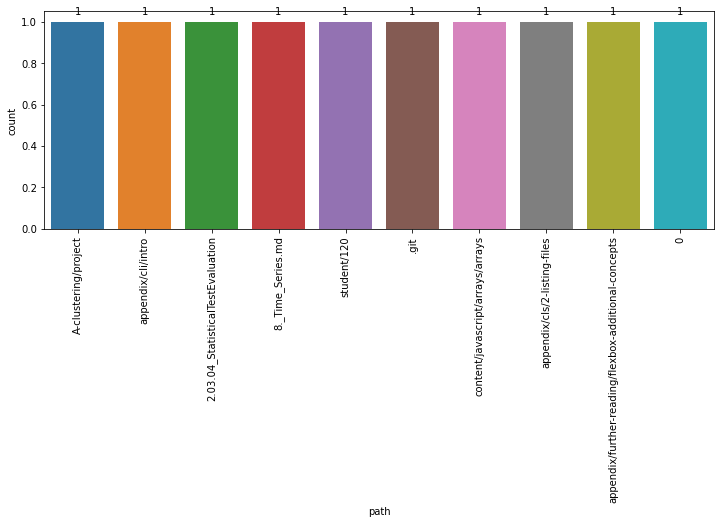

In [65]:
# plot the path for each 

#visualize the path and count of each login
#exponential decay
plt.figure(figsize=(12, 4))
splot = sns.barplot(data=viz_least_df, x = 'path', y = 'count', ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points'
                   )
    plt.xticks(rotation='vertical')

### Takeaways:
- The least visited curriculum pages are:
    - 5-stats/sampling
    - 7-clustering/3-wrangle
    - capstone-workbook
    - professional-development/professionalism-101
    - 12-distributed-ml/4-acquire
    - 10_Appendix_EntityLabeling
